# <center> CAO Points Analysis </center>
### Conor McCaffrey

***

![cao picture](Images/cao.png)

<i><sub> Picture adapted from Reference 1 </sub></i>
<br>


Please click the following link to go to the CAO website:
[CAO Website](https://www.cao.ie)

This notebook has two dual purposes: 
* To compare and contrast the CAO points in 2019,2020 and 2021 using the functionality of <i>Pandas</i>.
* To display knowledge gained throughout the duration of the course, in this case displayed through the use of plots and other visualisations of the above data.

***



### Table of Contents

#### Loading of Datasets
* Loading [2021 Points](#2021_Points) Dataset
* Loading [2020 Points](#2020_Points) Dataset 
* Loading [2019 Points](#2019_Points) Dataset 

#### Analyses of Datasets
* [Analysis of CAO Level 8,7,6 Points](#Analysis_of_CAO_Level_8,7,6_Points)
* [Descriptive Statistics on our newly-minted Dataframes](#Descriptive_Statistics_on_our_newly-minted_Dataframes)
* [Top 5 courses Points-wise](#Top_5_courses_Points-wise)
* [Courses within a certain Points-range](#Courses_within_a_certain_Points-range)
* [Which courses in 2019 & 2020 were in this points-range bracket?](#Which_courses_in_2019_&_2020_were_in_this_points-range_bracket?)
* [Which college offers the most Courses?](#Which_college_offers_the_most_Courses?)
* [How many courses didn't offer Round 2 in 2021 & 2020](#How_many_courses_didn't_offer_Round_2_in_2021_&_2020)
* [Sharpest changes in Points between Mid & EOS for 2019](#Sharpest_changes_in_Points_between_Mid_&_EOS_for_2019)
* [Exploration of some variables in Level 7 Data](#Exploration_of_some_variables_in_Level_7_Data.)
* [Did any Courses cease operating from 2019 up to 2021?](#Did_any_Courses_cease_operating_from_2019_up_to_2021?)
* [Which courses had the most points in 2021 and 2019 for Level 7 that were run both years?](#Which_courses_had_the_most_points_in_2021_and_2019_for_Level_7_that_were_run_both_years?)



### Let's import our packages

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames. (dataframes is another way to say spreadsheets)
import pandas as pd

# For downloading.
import urllib.request as urlrq

# For plotting
import seaborn as sns

# For plotting
import matplotlib.pyplot as plt

# Enhanced Plotting wtih Plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")



<a id='2021_Points'></a>
<br>

## 2021 Points

#### Please click below for 2021 courses
http://www.cao.ie/index.php?page=points&p=2021




Give overview here of response function (concise)

##### Steps to re-produce loading of Data in Pandas Dataframe

1. Use Requests library [3] to make HTTP request to Python.
2. Using DateTime package to get current date and time [4], create a filepath for data.
3. Rectify encoding error on dataset by setting to 'cp1252'.
4. Re-save Word Document for editing.
5. Save this rectifed HTML dataset.
6. Using regular expressions [5], select the information we require from HTML file.
7. Loop through this file, using regular expression and save as a .csv file.
8. Read this .csv file into a Pandas dataframe
9. Call a method on the dataframe to ensure it is loaded correctly



##### Let's gather the Level 8 courses

In [2]:
# Fetch the CAO Level 8 points URL.  (based on Lecture Notes)
resp8 = rq.get('http://www2.cao.ie/points/l8.php')
# Have a quick look to ensure all is okay
resp8       # Response 200 means all is okay. 404 means not found

<Response [200]>

##### Let's gather the Level 7/6 courses

In [3]:
# Fetch the CAO Level 7/6 points URL (adapted from Lecture Notes)
resp7 = rq.get('http://www2.cao.ie/points/l76.php')
# Have a quick look to ensure all is okay
resp7      # Response 200 means all is okay. 404 means not found

<Response [200]>

<br>

## Save original dataset

In [4]:
# Get current date and time using Datetime Package [4]
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [5]:
# Create a filepath for original Level 8 data (Based on reference 6)
path_HTML8 = 'data/cao2021_Lvl8_' +  nowstr + '.html'
# Create a filepath for original Level 7/6 data
path_HTML7 = 'data/cao2021_Lvl76_' +  nowstr + '.html'

<br>

## Charset error on CAO server

***

Technically the server says we should decode as iso-8859:

```
Content-Type: text/html; charset=iso-8859-1

```

However, one line uses \x96 which isnt defined in iso-8859-1. <br>
Therefore, we use the similar decoding standard cp1252 which is similar but also includes \x96.

In [6]:
## Level 8
# Accounting for the error on the server
original_encoding = resp8.encoding
# Change it to cp1252
resp8.encoding = 'cp1252'

In [7]:
# Save the original HTML file
with open(path_HTML8, 'w') as f:
    f.write(resp8.text)

In [8]:
## Level 7/6
# Accounting for the error on the server for Level 7/6 data
original_encoding = resp7.encoding
# Change it to cp1252
resp7.encoding = 'cp1252'

In [9]:
# Save the original HTML file
with open(path_HTML7, 'w') as f:
    f.write(resp7.text)

# Use regular expressions to select lines we want

***

In [10]:
# Compile the regular expression for matching lines. [5]
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') 


### Loop through the lines of the response and save result as a dataframe

***

In [11]:
#The filepath for the csv file. Level 8
path2021_8 = 'data/cao2021_Lvl8_' +  nowstr + '.csv'



In [12]:
# keep track of how many courses we process  COMMENT THIS
no_lines = 0

# Open the csv file for writing.
try:
    with open (path2021_8, 'w') as f:
        # Write a header row.
        f.write(','.join(['Code', 'Title', 'PointsR1', 'PointsR2']) + '\n')
        # Loop through the lines of the response.
        for line in resp8.iter_lines(): # took from google stack overflow.
        # Decode line, using the wrong encoding!
            dline = line.decode('cp1252')
        # match only the lines we want - the ones representing courses.
        # getting set up for regular expression. 'pattern is the regular expression itself'
            if re_course.fullmatch(dline):   
            # Add one to the lines counter
                no_lines = no_lines + 1
            # The course code
                course_code = dline[:5]
            # The course title
                course_title = dline[7:57].strip() # Remove whitespace
            # Round 1 points
                course_points = re.split(' +', dline[60:])
                if len(course_points) != 2:
                    course_points = course_points[:2]
            # Join the fields using a comma.
            # make final two elements into arrays with 3 things.
                linesplit = [course_code, course_title, course_points[0], course_points[1]] 
            # rejoin the substrings with commas in between.
                f.write(','.join(linesplit) + '\n')
except BaseException as err:
    print('This has caused an error')
else:
    print('Process has been successful.',f'Total number of lines is {no_lines}.')          




Process has been successful. Total number of lines is 949.


<br>

<b> ** N.B ** </b> It was verified as of 08/11/2021 there were 949 courses exactly in the CAO 2021 Points List.

***

In [13]:
# Saving our result in a dataframe [7]
df2021_8 = pd.read_csv(path2021_8, encoding='cp1252') 

# consider making a table listing University and the letters for it

In [14]:
# Calling variable to test
df2021_8

,Code,Title,PointsR1,PointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


***
## <u> Now let's complete the same for Level 7/6 Data </u>
 <br>
 
 ### Loop through the lines of the response and save result as a dataframe


In [15]:
#The filepath for the csv file.

path2021_7 = 'data/cao2021_Lvl76_' +  nowstr + '.csv'
# keep track of how many courses we process
no_lines = 0

# Open the csv file for writing.
try:
    with open (path2021_7, 'w') as f:
        # Write a header row.
        f.write(','.join(['Code', 'Title', 'PointsR1', 'PointsR2']) + '\n')
        # Loop through the lines of the response.
        for line in resp7.iter_lines(): # took from google stack overflow.
            # Decode line, using the wrong encoding!
            dline = line.decode('cp1252')
            # match only the lines we want - the ones representing courses.
            if re_course.fullmatch(dline):   
                # Add one to the lines counter
                no_lines = no_lines + 1
        
                # The course code
                course_code = dline[:5]
                # The course title
                course_title = dline[7:57].strip()
                # Round 1 points
                course_points = re.split(' +', dline[60:])
                if len(course_points) != 2:
                    course_points = course_points[:2]
                # Join the fields using a comma.
                # make last two things into arrays with 3 things.
                linesplit = [course_code, course_title, course_points[0], course_points[1]] 
                # rejoin the substrings with commas in between.
                f.write(','.join(linesplit) + '\n')
except BaseException as err:
    print('This has caused an error')
else:
    print('Process has been successful.',f'Total number of lines is {no_lines}.')    


Process has been successful. Total number of lines is 416.


<br>

<b> ** N.B ** </b> It was verified as of 23/11/2021 there were 416 courses exactly in the CAO 2021 Points List for Level 7/6.

***

In [16]:
# Saving our result in a dataframe [7]

df2021_7 = pd.read_csv(path2021_7, encoding='cp1252') 

In [17]:
# lets ensure it calls out correctly
df2021_7

,Code,Title,PointsR1,PointsR2
0,AL605,Music and Instrument Technology,211,NaN
1,AL630,Pharmacy Technician,308,NaN
2,AL631,Dental Nursing,311,NaN
3,AL632,Applied Science,297,NaN
4,AL650,Business,AQA,AQA
...,...,...,...,...
411,WD188,Applied Health Care,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
413,WD206,Electronic Engineering,180,NaN
414,WD207,Mechanical Engineering,172,NaN


<br>
<a id='2020_Points'></a>

## 2020 Points

#### Please click below for 2020 courses
http://www.cao.ie/index.php?page=points&p=2020





***

In [18]:
# Saving URL for 2020 points to the variable url2020
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

##### Steps to re-produce loading of Data in Pandas Dataframe

1. Using DateTime package, create filepath for data in excel format.
2. Save this file to disk using 'path' variable and url requests (https://docs.python.org/3/library/urllib.request.html).
3. Read data into Pandas Dataframe [7], using skiprows to remove unecessary data.
4. Spot check the data to ensure it has all transferred correctly.
5. Creat filepath for dataframe in excel .csv format.
6. Save Pandas dataframe to disk.


<br>

### Save Original Dataset

***

#### Let's gather the Data

In [19]:
# Create a filepath for original data. 
path2020 = 'data/cao2020_' +  nowstr + '.xlsx'

In [20]:
# Save original file to disk. [8]
urlrq.urlretrieve(url2020, path2020) 

('data/cao2020_20211201_210911.xlsx',
 <http.client.HTTPMessage at 0x1f577bff160>)

<br>

#### Load Spreadsheet using Pandas

***

In [21]:
# Download and parse the excel spreadsheet
# Read excel function turns it into a dataframe in memory so we are now dealing with pandas df from here
df2020 = pd.read_excel(url2020, skiprows = 10) # pandas dataframe

In [22]:
# Calling the variable to test
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

<b> ** N.B ** </b> It was verified as of 23/11/2021 there were 1464 courses exactly in the CAO 2020 Points List.

***

In [23]:
# Testing our dataframe. iloc retrieves row location [9]
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [24]:
# Testing final row
df2020.iloc[1463]  # spot checks

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [25]:
# Create a filepath for the Pandas data
path = 'data/cao2020_' +  nowstr + '.csv'

In [26]:
# Save Pandas dataframe to disk. Look up to_csv to get rid of row index
df2020.to_csv(path)

***
<br>
<a id='2019_Points'></a>


## 2019 Points

<i> Please [Click Here](http://www.cao.ie/index.php?page=points&p=2019 "click Here") for 2019 points </i>



##### Steps to re-produce this work

1. Download original PDF file.
2. Open original PDF file in Microsoft Word.
3. Save Microsoft Word's converted PDF in docx format.
4. Re-save Word Document for editing.
5. Delete Headers and Footers.
6. Delete preamble on Page 1.
7. Select all and copy.
8. Paste into Notepad ++.
9. Remove HEI name headings and paste onto each course line.
10. Delete blank lines.
11. Replace double tab characters with a single tab character (6 occurences)
12. Deleted tab characters at end of lines
13. Change backticks to apostrophes

## Lets prepare our Level 8 Data

In [27]:
# Constructing our dataframe
df2019 = pd.read_csv('data/cao2019_20211108_223304.csv', sep = '\t') # separate on tabs
# Call our new variable
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


<br>

<b> ** N.B ** </b> It was verified as of 23/11/2021 there were 930 courses exactly in the CAO 2019 Points List for Level 8.

***

In [28]:
# Spot checks
df2019.iloc[900:926]

,Course Code,Course,EOS,Mid
900,WD048,Business (options),278,357.0
901,WD084,Accounting,307,403.0
902,WD091,Hospitality Management,210,281.0
903,WD116,General Nursing,413,430.0
904,WD117,Psychiatric Nursing,361,382.0
905,WD120,Intellectual Disability Nursing,338,359.0
906,WD134,International Business,289,350.0
907,WD137,Design (Visual Communications),253,373.0
908,WD140,Laws,290,352.0
909,WD144,Architecture,283,385.0


## Lets prepare our Level 7/6 Data

In [29]:
# Reading in our csv file
df2019_l7 = pd.read_csv('data/cao2019_20211101_221930_edited.CSV', sep = '\t')

In [30]:
# Spot checks
df2019.iloc[900:926]

,Course Code,Course,EOS,Mid
900,WD048,Business (options),278,357.0
901,WD084,Accounting,307,403.0
902,WD091,Hospitality Management,210,281.0
903,WD116,General Nursing,413,430.0
904,WD117,Psychiatric Nursing,361,382.0
905,WD120,Intellectual Disability Nursing,338,359.0
906,WD134,International Business,289,350.0
907,WD137,Design (Visual Communications),253,373.0
908,WD140,Laws,290,352.0
909,WD144,Architecture,283,385.0


In [31]:
# Sorting the values
df2019_l7.sort_values('Course Code')

,Course Code,Course,EOS,Mid
0,AL600,Software Design,205,306.0
1,AL601,Computer Engineering,196,272.0
2,AL602,Mechanical Engineering,258,424.0
3,AL604,Civil Engineering,252,360.0
4,AL630,Pharmacy Technician,306,366.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


<br>

<b> ** N.B ** </b> It was verified as of 23/11/2021 there were 461 courses exactly in the CAO 2019 Points List for Level 7/6.

***

<a id='Analysis_of_CAO_Level_8,7,6_Points'></a>

## <u> Analysis of CAO Level 8,7,6 Points </u>


<br>

## Lets join our imported Datasets for Level 8 data and 2020 data

In [32]:
# Lets concatenate all Round 1 points from 2021-2019
courses2021_8 = df2021_8[['Code', 'Title']] # Access columns we are interested in

# Lets repeat the above work for 2020
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['Code','Title']
courses2020.sort_values('Code')  # Display values, sorting on 'Code'


# Lets gather our Round 1 courses for 2019
courses2019_8 = df2019[['Course Code','Course']]
courses2019_8.columns = ['Code','Title']
courses2019_8.sort_values('Code')  # Display values, sorting on 'Code'


# Lets concatenate our results [10]
allcourses_L8 = pd.concat([courses2021_8, courses2020, courses2019_8], ignore_index=True) # Based on Lecture Notes


# Some manipulation of result, display result sorting on 'Code'
allcourses_L8.sort_values('Code')


# Finds all extra copies of duplicated rows
allcourses_L8[allcourses_L8.duplicated()]

# Returns a copy of the data frame with duplicates removed.
allcourses_L8.drop_duplicates()


# Finds all extra copies of duplicated rows
allcourses_L8[allcourses_L8.duplicated(subset =['Code'])]



# Returns a copy of the data frame with duplicates removed = based only on code [11]
allcourses_L8.drop_duplicates(subset = ['Code'], inplace = True, ignore_index = True)


### Pandas Join [13]


***

In [33]:
# Lets access 2021 Level 8 Data
df2021_8

,Code,Title,PointsR1,PointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [34]:
# Set the index to the code column
df2021_8.set_index('Code', inplace = True)
df2021_8.columns = ['Title','Points_R1_2021', 'Points_R2_2021']
df2021_8

,Title,Points_R1_2021,Points_R2_2021
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [35]:
# Set the index to the code column and for Round 1 Data
allcourses_L8.set_index('Code', inplace = True)
allcourses_L8 = allcourses_L8.join(df2021_8[[ 'Points_R1_2021']])
allcourses_L8

,Title,Points_R1_2021
Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [36]:
# Lets access 2020 Data
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Set the index to the code column and for Round 1 Data
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns=['Code', 'Points_R1_2020']
df2020_r1.set_index('Code', inplace = True)
df2020_r1

,Points_R1_2020
Code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [38]:
# Join 2020 points to allcourses_L8
allcourses_L8 = allcourses_L8.join(df2020_r1)
allcourses_L8

,Title,Points_R1_2021,Points_R1_2020
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


#### 2019 Join

In [39]:
# Set the index to the code column and for Round 1 Data
df2019_r1 = df2019[['Course Code', 'Mid']]
df2019_r1.columns = ['Code', 'Points_R1_2019']
df2019_r1.set_index('Code', inplace = True)
df2019_r1

,Points_R1_2019
Code,
AL801,328.0
AL802,306.0
AL803,337.0
AL805,442.0
AL810,349.0
...,...
WD200,296.0
WD210,329.0
WD211,322.0


In [40]:
# Join 2019 points to allcourses_l8 and display the dataframe
allcourses_L8 = allcourses_L8.join(df2019_r1)
allcourses_L8

,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,358.0
SG446,Applied Archaeology,NaN,NaN,290.0
TL803,Music Technology,NaN,NaN,288.0


We now have a dataframe that contains all R1 points for CAO courses from 2021-2019.

## Lets repeat this work for Level 7/6 Data for 2021 & 2019

In [41]:
# Lets concatenate all Round 1 points from 2021 and 2019
courses2021_7 = df2021_7[['Code', 'Title']] # Access columns we are interested in


# Lets gather our Round 1 courses for 2019
courses2019_7 = df2019_l7[['Course Code','Course']]
courses2019_7.columns = ['Code','Title']
courses2019_7.sort_values('Code')  # Display values, sorting on 'Code'


# Lets concatenate our results [10]
allcourses_L7 = pd.concat([courses2021_7, courses2019_7], ignore_index=True) # Based on Lecture Notes


# Some manipulation of result, display result sorting on 'Code'
allcourses_L7.sort_values('Code')


# Finds all extra copies of duplicated rows
allcourses_L7[allcourses_L7.duplicated()]

# Returns a copy of the data frame with duplicates removed.
allcourses_L7.drop_duplicates()


# Finds all extra copies of duplicated rows
allcourses_L7[allcourses_L7.duplicated(subset =['Code'])]



# Returns a copy of the data frame with duplicates removed = based only on code [11]
allcourses_L7.drop_duplicates(subset = ['Code'], inplace = True, ignore_index = True)

In [42]:
# Lets access 2021 Data
df2021_7

,Code,Title,PointsR1,PointsR2
0,AL605,Music and Instrument Technology,211,NaN
1,AL630,Pharmacy Technician,308,NaN
2,AL631,Dental Nursing,311,NaN
3,AL632,Applied Science,297,NaN
4,AL650,Business,AQA,AQA
...,...,...,...,...
411,WD188,Applied Health Care,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
413,WD206,Electronic Engineering,180,NaN
414,WD207,Mechanical Engineering,172,NaN


In [43]:
# Set the index to the code column and for Round 1 Data
df2021_7.set_index('Code', inplace = True)
df2021_7.columns = ['Title','Points_R1_2021', 'Points_R2_2021']
df2021_7

,Title,Points_R1_2021,Points_R2_2021
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,NaN
AL631,Dental Nursing,311,NaN
AL632,Applied Science,297,NaN
AL650,Business,AQA,AQA
...,...,...,...
WD188,Applied Health Care,220,NaN
WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
WD206,Electronic Engineering,180,NaN


In [44]:
# Set the index to the code column and for Round 1 Data
allcourses_L7.set_index('Code', inplace = True)
allcourses_L7 = allcourses_L7.join(df2021_7[[ 'Points_R1_2021']])
allcourses_L7

,Title,Points_R1_2021
Code,,
AL605,Music and Instrument Technology,211
AL630,Pharmacy Technician,308
AL631,Dental Nursing,311
AL632,Applied Science,297
AL650,Business,AQA
...,...,...
TL620,Culinary Arts,NaN
TL712,Computing with Digital Media,NaN
TL719,Culinary Arts,NaN


In [45]:
# Lets access 2019 Data
df2019_l7

,Course Code,Course,EOS,Mid
0,AL600,Software Design,205,306.0
1,AL601,Computer Engineering,196,272.0
2,AL602,Mechanical Engineering,258,424.0
3,AL604,Civil Engineering,252,360.0
4,AL630,Pharmacy Technician,306,366.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


In [46]:
# Set the index to the code column and for Round 1 Data
df2019_l7 = df2019_l7[['Course Code', 'Mid']]
df2019_l7.columns = ['Code', 'Points_Mid_2019']
df2019_l7.set_index('Code', inplace = True)
df2019_l7

,Points_Mid_2019
Code,
AL600,306.0
AL601,272.0
AL602,424.0
AL604,360.0
AL630,366.0
...,...
WD188,339.0
WD205,441.0
WD206,322.0


In [47]:
# Set the index to the code column and for Round 1 Data
allcourses_L7 = allcourses_L7.join(df2019_l7[[ 'Points_Mid_2019']])
allcourses_L7

,Title,Points_R1_2021,Points_Mid_2019
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,366.0
AL631,Dental Nursing,311,379.0
AL632,Applied Science,297,372.0
AL650,Business,AQA,317.0
...,...,...,...
TL620,Culinary Arts,NaN,234.0
TL712,Computing with Digital Media,NaN,352.0
TL719,Culinary Arts,NaN,368.0


We now have a dataframe that contains all R1 points for CAO courses for 2021 and 2019 Level 7/6. It was not feasible to include 2020 in this category as all raw data is contained on the same spreadsheet, which is a shame. 

<a id='Descriptive_Statistics_on_our_newly-minted_Dataframes'></a>

## Descriptive Statistics on our newly-minted Dataframes

In [48]:
allcourses_L7

,Title,Points_R1_2021,Points_Mid_2019
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,366.0
AL631,Dental Nursing,311,379.0
AL632,Applied Science,297,372.0
AL650,Business,AQA,317.0
...,...,...,...
TL620,Culinary Arts,NaN,234.0
TL712,Computing with Digital Media,NaN,352.0
TL719,Culinary Arts,NaN,368.0


In [49]:
allcourses_L8

,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,358.0
SG446,Applied Archaeology,NaN,NaN,290.0
TL803,Music Technology,NaN,NaN,288.0


In [50]:
# Size of our dataframe
shape = allcourses_L8.shape
print('Data frame shape', shape, 'rows,columns')

# Print the first ten rows.
allcourses_L8.head(10)

Data frame shape (1651, 4) rows,columns


,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
AL811,Civil Engineering,NaN,320,NaN
AL820,Mechanical and Polymer Engineering,327,308,358.0
AL830,General Nursing,451*,442,429.0
AL832,Mental Health Nursing,440*,387,403.0


In [51]:
# Size of our dataframe
shape = allcourses_L7.shape
print('Data frame shape', shape, 'rows,columns')

# Print the first five lines.
allcourses_L7.head()

Data frame shape (554, 3) rows,columns


,Title,Points_R1_2021,Points_Mid_2019
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,366.0
AL631,Dental Nursing,311,379.0
AL632,Applied Science,297,372.0
AL650,Business,AQA,317.0


Our dataframes have been constructed so that they are quite visually accessible. We have our Course Code (Code), our Course Title (Title), and our Round 1 points for each applicable year. The Level 8 data contains 1651 rows and our Level 7/6 data contains 554 rows. In our Level 7 dataframe for 2019, we have taken the median value (or mid-point average) of points for the given course.

In [52]:
print('This is the information regarding Level 8 courses')
info1 = allcourses_L8.info()
print()
print('This is the information regarding Level 7 courses')
info2 = allcourses_L7.info()


This is the information regarding Level 8 courses
<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1651 non-null   object 
 1   Points_R1_2021  928 non-null    object 
 2   Points_R1_2020  1437 non-null   object 
 3   Points_R1_2019  915 non-null    float64
dtypes: float64(1), object(3)
memory usage: 129.0+ KB

This is the information regarding Level 7 courses
<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, AL605 to WD139
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            554 non-null    object 
 1   Points_R1_2021   408 non-null    object 
 2   Points_Mid_2019  453 non-null    float64
dtypes: float64(1), object(2)
memory usage: 33.5+ KB


In [53]:
# It appears we have NaN values in our datasets, let's confirm this
# Work adapted from reference 14
check_NaN_in_df = allcourses_L8.isnull().values.any()
print (check_NaN_in_df) # Boolean to determine presence of NaN values
check_NaN_in_df = allcourses_L8.isnull()
print (check_NaN_in_df) # Verifying this with a snapshot of data
# Count of the NaN Values
print('We have' ,allcourses_L8.isnull().sum().sum(), 'NaN values in our dataset' )

True
       Title  Points_R1_2021  Points_R1_2020  Points_R1_2019
Code                                                        
AL801  False           False           False           False
AL802  False           False           False           False
AL803  False           False           False           False
AL805  False           False           False           False
AL810  False           False           False           False
...      ...             ...             ...             ...
SG441  False            True            True           False
SG446  False            True            True           False
TL803  False            True            True           False
TL812  False            True            True           False
WD148  False            True            True           False

[1651 rows x 4 columns]
We have 1673 NaN values in our dataset


In [54]:
# It appears we have NaN values in our datasets, let's confirm this
# Work adapted from reference 14
check_NaN_in_df = allcourses_L7.isnull().values.any()
print (check_NaN_in_df)
check_NaN_in_df = allcourses_L7.isnull()
print (check_NaN_in_df)
# Count of the NaN Values
print('We have' ,allcourses_L7.isnull().sum().sum(), 'NaN values in our dataset' )

True
       Title  Points_R1_2021  Points_Mid_2019
Code                                         
AL605  False           False             True
AL630  False           False            False
AL631  False           False            False
AL632  False           False            False
AL650  False           False            False
...      ...             ...              ...
TL620  False            True            False
TL712  False            True            False
TL719  False            True            False
TL746  False            True             True
WD139  False            True            False

[554 rows x 3 columns]
We have 247 NaN values in our dataset


In [55]:
# Investigating the two NaN values I've spotted for a course to confirm
allcourses_L7.iloc[552]

Title              Engineering in Mechatronics Engineering
Points_R1_2021                                         NaN
Points_Mid_2019                                        NaN
Name: TL746, dtype: object

** <b>N.B</b> ** I have confirmed that result is indeed correct by verifying from raw data on 26/11/2021

In [56]:
# Lets try get rid of rows that contain two NaN values in our L7/6 data - this is useless for comparison [15]
allcourses_L7.dropna( subset = ['Points_R1_2021', 'Points_Mid_2019'], how = 'all', inplace = True)
allcourses_L7

,Title,Points_R1_2021,Points_Mid_2019
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,366.0
AL631,Dental Nursing,311,379.0
AL632,Applied Science,297,372.0
AL650,Business,AQA,317.0
...,...,...,...
SG537,Marketing and Sales,NaN,270.0
TL620,Culinary Arts,NaN,234.0
TL712,Computing with Digital Media,NaN,352.0


In [57]:
# Lets try get rid of rows that contain two NaN values in our L8 data - this is useless for comparison [15]
allcourses_L8.dropna(subset = ['Points_R1_2021' , 'Points_R1_2020' , 'Points_R1_2019'], how = 'all', inplace = True)
allcourses_L8

,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,328.0
AL802,Software Design in Artificial Intelligence for...,313,332,306.0
AL803,Software Design for Mobile Apps and Connected ...,350,337,337.0
AL805,Computer Engineering for Network Infrastructure,321,333,442.0
AL810,Quantity Surveying,328,319,349.0
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,358.0
SG446,Applied Archaeology,NaN,NaN,290.0
TL803,Music Technology,NaN,NaN,288.0


This comes across as a little 'hacky' but I believe it is necessary. We are removing rows that have essentially no values. Rows with no values serve no purpose when we are trying to compare/contrast changes in points over a certain range of years. I am aware we will still have rows that contain 1 or 2 NaN values for Level 8 Data and perhaps 1 NaN value in our Level 7/6 data.

In [58]:
# From calling the 'info' method above, it also appears we have 'objects' 
# where we would ideally have floats

# Lets convert our values to floats for analysis (Developed from Reference 16)
allcourses_L8['Points_R1_2021'] = pd.to_numeric(allcourses_L8['Points_R1_2021'], errors='coerce').astype('float')
allcourses_L8['Points_R1_2020'] = pd.to_numeric(allcourses_L8['Points_R1_2020'], errors='coerce').astype('float')
allcourses_L7['Points_R1_2021'] = pd.to_numeric(allcourses_L7['Points_R1_2021'], errors='coerce').astype('float')

# Printing .info() again to ensure conversion occurred 
allcourses_L8.info()
allcourses_L7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, AL801 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1629 non-null   object 
 1   Points_R1_2021  778 non-null    float64
 2   Points_R1_2020  1387 non-null   float64
 3   Points_R1_2019  915 non-null    float64
dtypes: float64(3), object(1)
memory usage: 63.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, AL605 to WD139
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            543 non-null    object 
 1   Points_R1_2021   377 non-null    float64
 2   Points_Mid_2019  453 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.0+ KB


<b>I now think our datasets are ready for analyses.</b>
<br>
<b> ** N.B ** </b> A caveat to note for this analyses is we are comparing and contrasting courses that have points assigned to them.

In [59]:
# Describe method give basic statistical summaries of all numerical attributes in the dataframe.
allcourses_L8.describe()

,Points_R1_2021,Points_R1_2020,Points_R1_2019
count,778.000000,1387.000000,915.000000
mean,380.690231,350.217015,426.414208
std,101.273464,134.311616,133.142255
min,201.000000,55.000000,57.000000
25%,300.000000,252.000000,339.000000
50%,367.000000,316.000000,397.000000
75%,465.000000,430.500000,477.500000
max,613.000000,1088.000000,1073.000000


From analysis this descriptive table, we can observe a few noteworthy points:
* There were 846, 1387 and 915 courses with points in 2021, 2020 and 2019 respectively.
* The mean values for courses were 393 , 350 and 426 points for courses in 2021, 2020 and 2019 respectively.
* The courses with the least amount of required points were as follows: 2021:201 , 2020:55 and 2019:57. Lets look at these courses later as these numbers appear very low.
* The courses with the highest amount of required points were as follows: 2021:625 , 2020:1088 and 2019:1073. Lets look at these courses later.
* 75% of courses in 2021 are captured within 465 points and 75% of courses are captured within 431 points in 2020 and within 478 points in 2019.

In [60]:
# Describe method gives the basic statistical summaries of all numerical attributes in the dataframe.
allcourses_L7.describe()

,Points_R1_2021,Points_Mid_2019
count,377.000000,453.000000
mean,243.156499,345.830022
std,71.737883,77.590483
min,100.000000,146.000000
25%,200.000000,300.000000
50%,234.000000,337.000000
75%,279.000000,377.000000
max,500.000000,873.000000


From analysis this descriptive table, we can observe a few noteworthy points:
* There were 377 and 453 courses with points in 2021 and 2019 respectively. This is a big drop.
* The mean values for courses were 243 and 346 points for courses in 2021 and 2019 respectively.
* The courses with the least amount of required points were as follows: 2021:100 and 2019:146. This already tells us that the points requirements have dropped from 2019 up to 2021.
* The courses with the highest amount of required points were as follows: 2021:500 and 2019:873. 
* 75% of courses in 2021 are captured within 279 points and 75% of courses are captured within 377 points in 2019.

In [61]:
# As a final workaround on NaN values, we can fill them with the overall mean value [17]
allcourses_L8['Points_R1_2021'].fillna(393.287, inplace=True)
allcourses_L8['Points_R1_2020'].fillna(350.217, inplace=True)
allcourses_L8['Points_R1_2019'].fillna(426.414, inplace=True)

# Calling our variable to determine presence of NULL values
allcourses_L8.isnull().sum()


Title             0
Points_R1_2021    0
Points_R1_2020    0
Points_R1_2019    0
dtype: int64

In [62]:
# As a final workaround on NaN values, we can fill them with the overall mean value 
allcourses_L7['Points_R1_2021'].fillna(243.156, inplace=True)
allcourses_L7['Points_Mid_2019'].fillna(345.830, inplace=True)

# Calling our variable to determine presence of NULL values
allcourses_L7.isnull().sum()

Title              0
Points_R1_2021     0
Points_Mid_2019    0
dtype: int64

We now have no NULL values in either dataset.

In [63]:
# Let's create a dataframe with abbreviations of Institutions
data = [['AC', 'American College'], ['AD', 'National College of Art and Design'], ['AL', 'Athlone Institute of Technology'] ,['AS', 'St. Angela\'s College'],['BN', 'Institute of Technology, Blanchardstown'], ['BY', 'IBAT College Dublin'] ,['CI', 'Irish College of Humanities & Applied Sciences' ],['CK', 'University College Cork (NUI)'],['CM', 'Marino Institute of Education'],['CR', 'Cork Institute of Technology' ],['CT', 'CCT College Dublin'],
        ['CW', 'Institute of Technology, Carlow'],['DB', 'Dublin Business School'],['DC', 'Dublin City University'],['DK','Dundalk Institute of Technology'],['DL', 'Dun Laoghaire Institute of Art, Design and Technology'],['DN', 'University College Dublin (NUI)'],['DS', 'Dorset College'],['DT', 'Dublin Institute of Technology'],['GA', 'Galway-Mayo Institute of Technology'],['GB', 'Galway Business School'],['GC', 'Griffith College'],
        ['GY', 'National University of Ireland, Galway'],['ID', 'ICD Business School'],['LC', 'Limerick Institute of Technology'],['LM', 'University of Limerick'],['LY', 'Letterkenny Institute of Technology'],['MH', 'Maynooth University'],['MI', 'Mary Immaculate College'], ['MT','Munster Technological University'],['MU','Pontifical University, St Patrick\'s College' ],['NC', 'National College of Ireland (NCI)'],['NM', 'St Nicholas Montessori College Ireland']
       ,['PC', 'Carlow College, St. Patrick\'s'],['RC', 'RCSI University of Medicine & Health Sciences'],['SG', 'Institute of Technology, Sligo'], ['TA', 'Institute of Technology, Tallaght'],['TL', 'Institute of Technology, Tralee'],['TR', 'Trinity College Dublin'],['TU', 'Technological University Dublin'],['WD', 'Waterford Institute of Technology']]
  
# Create the pandas DataFrame
abbrev = pd.DataFrame(data, columns = ['Code', 'Institution'])
abbrev.set_index('Code', inplace = True)

# print dataframe to check
abbrev.head(5)

,Institution
Code,
AC,American College
AD,National College of Art and Design
AL,Athlone Institute of Technology
AS,St. Angela's College
BN,"Institute of Technology, Blanchardstown"


<a id='Top_5_courses_Points-wise'></a>



### Top 5 courses Points-wise

In [64]:
# Let's plot our top 5 courses points-wise in the Level 8 data in 2021
top_5 = allcourses_L8.sort_values(by='Points_R1_2021', ascending=False).head()
top_5

,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
GY303,Biomedical Science,613.0,556.0,566.0
GY502,Occupational Therapy,601.0,555.0,543.0
DC119,Global Business (Canada),601.0,564.0,577.0
TR035,Theoretical Physics,590.0,543.0,601.0
MI008,Education and Psychology - Primary Teaching,590.0,588.0,555.0


In [65]:
# Lets plot this for each year using Plotly [20]

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=3, subplot_titles=('2021', '2020', '2019')
)

# Add traces
fig.add_trace(go.Bar(x=top_5['Title'], y=top_5['Points_R1_2021'], name = '2021'), row=1, col=1)
fig.add_trace(go.Bar(x=top_5['Title'], y=top_5['Points_R1_2020'], name = '2020'), row=1, col=2)
fig.add_trace(go.Bar(x=top_5['Title'], y=top_5['Points_R1_2019'], name = '2019'), row=1, col=3)

# Update xaxis properties
fig.update_xaxes(title_text='Level 8 2021', row=1, col=1)
fig.update_xaxes(title_text='Level 8/7/6 2020', row=1, col=2)
fig.update_xaxes(title_text='Level 8 2019', row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text='Points', row=1, col=1)


# Update title and height
fig.update_layout(title_text='Top 5 Courses', height=700)

fig.write_image('Images/Top5.png')

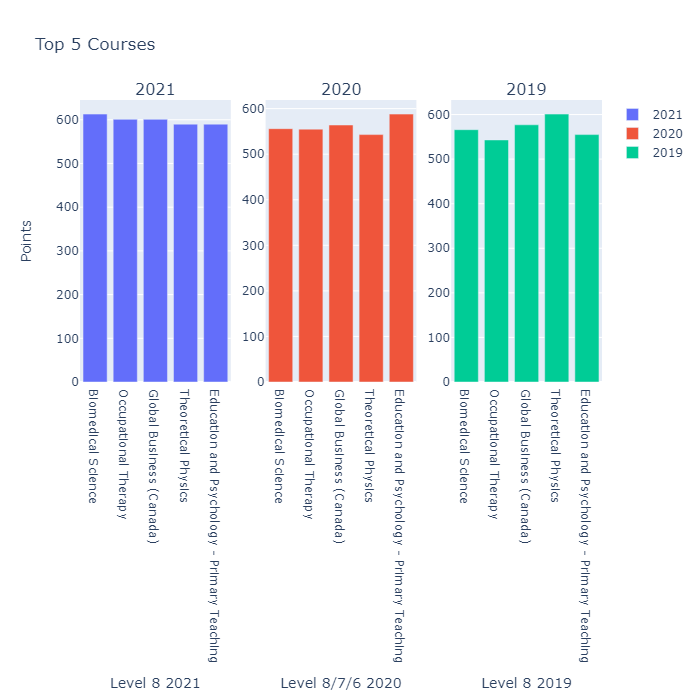

,Title,Points_R1_2021,Points_R1_2020,Points_R1_2019
Code,,,,
GY303,Biomedical Science,613.0,556.0,566.0
GY502,Occupational Therapy,601.0,555.0,543.0
DC119,Global Business (Canada),601.0,564.0,577.0
TR035,Theoretical Physics,590.0,543.0,601.0
MI008,Education and Psychology - Primary Teaching,590.0,588.0,555.0


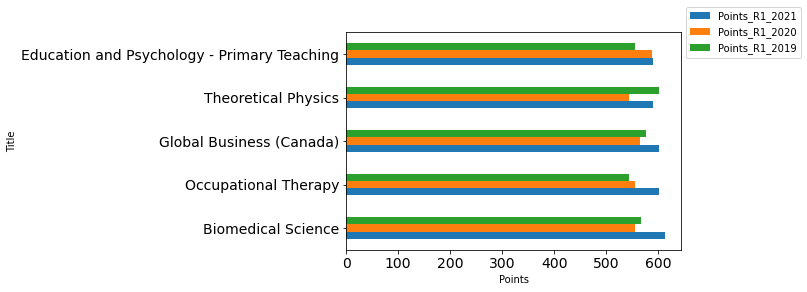

In [66]:
# Let's plot this result on the same plot [19] and grouped by each course
top_5.plot(kind='barh', x = 'Title')
plt.yticks( 
    horizontalalignment='right', # ensure Title does not overlap on plot
    fontsize = 14)
plt.xticks(
    fontsize = 14)
plt.legend(loc='center left', bbox_to_anchor=(1, 1.0)) # Position legend outside of plot
plt.xlabel('Points')
top_5

The top result appears to be GY303- Biomedical Science. Let's call on our Abbreviations table to determine what institution offers this course and also the other courses in our result.

In [67]:
 # let's find out where these courses are offered (Based on reference 18)
top_5_courses = abbrev.loc[['GY', 'MI', 'TR', 'DC']]
top_5_courses

,Institution
Code,
GY,"National University of Ireland, Galway"
MI,Mary Immaculate College
TR,Trinity College Dublin
DC,Dublin City University


We can see from the above body of work some differences in points from the top 5 courses in 2021. Biomedical Science in NUIG has increased 57 points from 2020. This was the highest jump betwen the 5 courses in 2021. Global Business (Canada) from DCU has been consistently high during this period but there was also quite a jump in points requirements (37 points) between 2020 and 2021. Primary Teaching in Mary Immaculate is consistently high. It was interesting to see Mary Immaculate in this list as I was not expecting this. 

<a id='Courses_within_a_certain_Points-range'></a>

### Courses within a certain Points-range

In [68]:
# Lets determine how many courses required over 550 points each year
# Researched using Reference 21 and Reference 24

#2021
top_courses_2021 = allcourses_L8[[ 'Title', 'Points_R1_2021']] # Isolate what we want
# Setting limits
top_courses_2021 = top_courses_2021[(top_courses_2021['Points_R1_2021'] > 550)
                                    & (top_courses_2021['Points_R1_2021'] < 626) ].sort_values('Points_R1_2021')

#2020
top_courses_2020 = allcourses_L8[[ 'Title', 'Points_R1_2020']] # Isolate what we want
#Setting limits
top_courses_2020 = top_courses_2020[(top_courses_2020['Points_R1_2020'] > 550) 
                                    & (top_courses_2020['Points_R1_2020'] < 626) ].sort_values('Points_R1_2020')

#2019
top_courses_2019 = allcourses_L8[[ 'Title', 'Points_R1_2019']] # Isolate what we want
# Setting limits
top_courses_2019 = top_courses_2019[(top_courses_2019['Points_R1_2019'] > 550) 
                                    & (top_courses_2019['Points_R1_2019'] < 626) ].sort_values('Points_R1_2019')


print('The number of courses requiring over 550 points and up to 625 points in 2021 are:',
      top_courses_2021['Points_R1_2021'].count())
print('The number of courses requiring over 550 points and up to 625 points in 2020 are:', 
      top_courses_2020['Points_R1_2020'].count())
print('The number of courses requiring over 550 points and up to 625 points in 2019 are:', 
      top_courses_2019['Points_R1_2019'].count())

print(top_courses_2021.sort_values(by='Points_R1_2021', ascending=False).head())
print(top_courses_2020.sort_values(by='Points_R1_2020', ascending=False).head())
print(top_courses_2019.sort_values(by='Points_R1_2019', ascending=False).head())

The number of courses requiring over 550 points and up to 625 points in 2021 are: 50
The number of courses requiring over 550 points and up to 625 points in 2020 are: 49
The number of courses requiring over 550 points and up to 625 points in 2019 are: 49
                                             Title  Points_R1_2021
Code                                                              
GY303                           Biomedical Science           613.0
DC119                     Global Business (Canada)           601.0
GY502                         Occupational Therapy           601.0
MI008  Education and Psychology - Primary Teaching           590.0
TR035                          Theoretical Physics           590.0
                                                   Title  Points_R1_2020
Code                                                                    
TU832      Architecture (Suitability Test and Interview)           622.0
TR052                                     Dental Science 

This is a very interesting result. We are exploring how many courses are in the upper ranges of available points. Points requirements throughout the period is quite consistent. I was curious to know whether there was an effect of COVID-19 i.e less people travelling to cities for University resulting in a drop off in number of applicants and thereby a reduction in points across the board. I would need data on applicant numbers to confirm this but it was a theory I wanted to explore. The numbers for 2020 and 2019 are identical. I set an upper limit as I wanted to exclude courses that contained additional requirements such as portfolios, extra tests, auditions etc. I only wanted to look at 'sit-down exams'.

In [69]:
top_courses_sorted_2021= top_courses_2021.sort_values(by='Points_R1_2021', ascending=False).head()
top_courses_sorted_2020= top_courses_2020.sort_values(by='Points_R1_2020', ascending=False).head()
top_courses_sorted_2019= top_courses_2019.sort_values(by='Points_R1_2019', ascending=False).head()

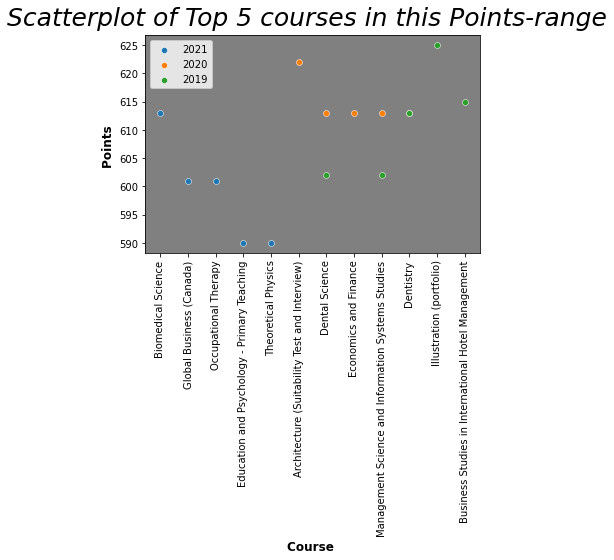

In [70]:
# Let's plot this result on the same plot using Seaborn
# Overall title and editing font for appearance
plt.suptitle('Scatterplot of Top 5 courses in this Points-range', style = 'italic', size = 25) # Overall title and editing font for appearance
ax = sns.scatterplot(x="Title", y="Points_R1_2021", label = '2021', data=top_courses_sorted_2021)
ax = sns.scatterplot(x="Title", y="Points_R1_2020", label = '2020' , data=top_courses_sorted_2020)
ax = sns.scatterplot(x="Title", y="Points_R1_2019", label = '2019', data=top_courses_sorted_2019)
ax.set_xlabel('Course ', fontsize='large', fontweight='bold') # decorating our labels
ax.set_ylabel('Points ', fontsize='large', fontweight='bold')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
ax.set_facecolor('grey') # setting background colour
plt.legend() # force legend to appear


<a id='Which_courses_in_2019_&_2020_were_in_this_points-range_bracket?'></a>



### Which courses in 2019 & 2020 were in this points-range bracket?

In [71]:
# Bringing in some SQL to combine with Pandas [22]
combined_dataframes =  pd.merge(top_courses_2020,top_courses_2019, on='Code')
print(combined_dataframes)
print('The number of courses in the top points-range in both 2019 and 2020 is:' , 
      combined_dataframes['Points_R1_2019'].count())

                                                 Title_x  Points_R1_2020  \
Code                                                                       
CK408                           Physics and Astrophysics           554.0   
TR012                      History and Political Science           555.0   
CK204                                            Finance           556.0   
CK307                                   Law and Business           556.0   
GY303                                 Biomedical Science           556.0   
DC119                           Global Business (Canada)           564.0   
CR320  Biomedical Science - Offered jointly by CIT an...           565.0   
TR018                                     Law and French           565.0   
TR056                           Human Health and Disease           565.0   
TR004                                                Law           566.0   
CK704                               Occupational Therapy           566.0   
CK407       

This is an interesting result. Here we have determined how many courses were in our 550-625 points range in 2019 and then determined if they were also present in the same range for 2020. Out of the 49 courses in 2019, 31 remained for 2020. This tells us that these courses have consistently high points requirements.

### Let's compare these with 2021.

In [72]:
# Lets compare this with 2021 i.e which courses were high for the 3 years
combined_dataframes_new =  pd.merge(combined_dataframes,top_courses_2021, on='Code')
print(combined_dataframes_new)
print('The number of courses in the top points-range for all three years is:' , 
     combined_dataframes_new['Points_R1_2021'].count())

                                           Title_x  Points_R1_2020  \
Code                                                                 
CK408                     Physics and Astrophysics           554.0   
GY303                           Biomedical Science           556.0   
DC119                     Global Business (Canada)           564.0   
CK407                        Mathematical Sciences           566.0   
MI008  Education and Psychology - Primary Teaching           588.0   

                                           Title_y  Points_R1_2019  \
Code                                                                 
CK408                     Physics and Astrophysics           566.0   
GY303                           Biomedical Science           566.0   
DC119                     Global Business (Canada)           577.0   
CK407                        Mathematical Sciences           578.0   
MI008  Education and Psychology - Primary Teaching           555.0   

                  

This result tells us that there are only 5 courses that appear in our selected points-range in 2019,2020 and 2021. It is no surprise that 4/5 courses appear in our 'Top-5' courses in our earlier section. 

<a id='Which_college_offers_the_most_Courses?'></a>


### Which college offers the most Courses? 

Something that I believe would be interesting (and a good display of <i>Pandas</i> knowledge) to know is how many Level 8 courses were offered by each Institution. 

In [73]:
# Lets make a copy of our Level 8 data first [24]
local = allcourses_L8.copy(deep=True)
local_df = local.reset_index() # resetting the index
# Make a new df called 'Abbreviations' capturing the first two letters of each row of 'Code' column
local_df_abb = local_df['Code'].str[:2]
local_df_abb # print to see if it worked


0       AL
1       AL
2       AL
3       AL
4       AL
        ..
1624    SG
1625    SG
1626    TL
1627    TL
1628    WD
Name: Code, Length: 1629, dtype: object

In [74]:
# Now lets count the occurrences of each Value
Occurrences  =  local_df_abb.value_counts()
Occurrences = local_df_abb.value_counts().rename_axis('Institution').reset_index(name='Count')
print(Occurrences.head())
print(Occurrences.tail())

  Institution  Count
0          TU    200
1          TR    129
2          GA     95
3          LC     88
4          CR     79
   Institution  Count
33          NM      3
34          ID      2
35          AC      2
36          MU      2
37          BY      1


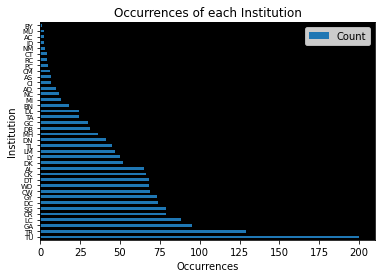

In [75]:
# Let's plot this result
Occurrences.plot(kind='barh', x = 'Institution')
ax = plt.axes()
plt.yticks( 
    horizontalalignment='right',
    fontsize = 7)
plt.xticks(
    fontsize = 10)
plt.xlabel('Occurrences')
plt.title('Occurrences of each Institution')
ax.set_facecolor('black') # changing background to aid visualisation


This is an interesting result. For Level 8 courses (and 2020 as a whole), we can see that Technological Univeristy offers 200 courses, which is the most by some distance. This makes sense as a some of institutions that were previously 'IT's' amalgamated under one umbrella. Next up comes Trinity which is offering 129 courses and then GMIT which is offering 95 courses based on our parameters. IBAT College Dublin appears to offer only 1 course based on our parameters. America College offers only 2 courses based on our parameters. 

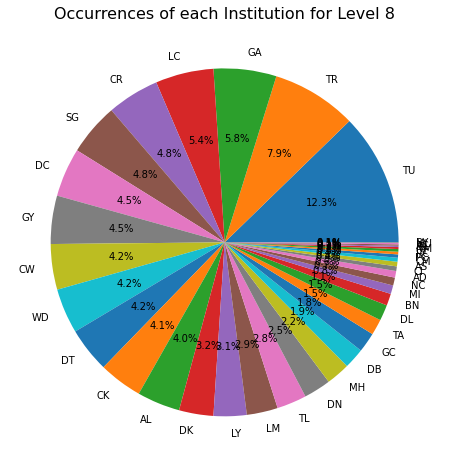

In [76]:
#Using matplotlib to make a pie chart of above result (adapted from Reference 23)
pie, ax = plt.subplots(figsize=[10,8])
labels = Occurrences['Institution']
plt.pie(x=Occurrences['Count'], autopct='%.1f%%', labels=labels) # autopct='%.1f%%' lets us display percentages
plt.title(('Occurrences of each Institution for Level 8'), fontsize=16);


This pie-chart depicts the same results as the plot above but only contains percentages which lets us get a good gauge on the distribution of the data. We can see now over 20% of courses offered were covered by TU (Technological University), TR (Trinity College) and (GA) GMIT.

<a id="How_many_courses_didn't_offer_Round_2_in_2021_&_2020"></a>


### How many courses didn't offer Round 2 in 2021 & 2020? 

,Value
Points_R1_2021,21
Points_R2_2021,691
R1 POINTS,27
R2 POINTS,1131


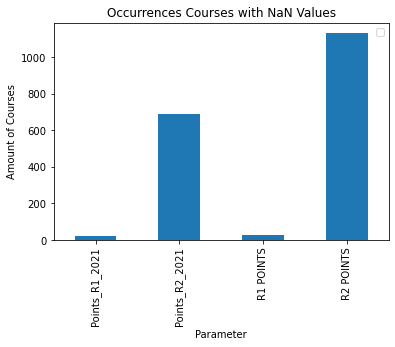

In [77]:
# Lets get a count of the number of NaN values in each column for 2021 Level 8 courses
# Researched using Reference 26
NaN_R1_2021 = df2021_8[['Points_R1_2021']] #isolate our values of interest
NaN_R2_2021 = df2021_8[['Points_R2_2021']]

NaN_R1_2021 = NaN_R1_2021[['Points_R1_2021']].isnull().sum() # return a value for NaN in our columns
NaN_R2_2021 = NaN_R2_2021[['Points_R2_2021']].isnull().sum()

# Lets get a count of the number of NaN values in each column for 2020 Level 8 courses
NaN_R1_2020 = df2020[['R1 POINTS']] #isolate our values of interest
NaN_R2_2020 = df2020[['R2 POINTS']]

NaN_R1_2020 = NaN_R1_2020[['R1 POINTS']].isnull().sum() # return a value for NaN in our columns
NaN_R2_2020 = NaN_R2_2020[['R2 POINTS']].isnull().sum()

# Let's combine our dataframes
NaN = [NaN_R1_2021, NaN_R2_2021, NaN_R1_2020,NaN_R2_2020]
NaN_Comb = pd.concat(NaN)
# Convert to Dataframe
NaN_Combined = NaN_Comb.to_frame()
# Lets plot our result
NaN_Combined.plot(kind = 'bar', xlabel = 'Parameter', ylabel = 'Amount of Courses')
plt.title('Occurrences Courses with NaN Values')
plt.legend('') # no legend required
NaN_Combined.columns = ['Value']
NaN_Combined

We can see from the resulting table and graph the stark differences between courses with no associated value between 2021 and 2020. For Round 2 results in 2021, we can see 691 courses returned from our search for no values associated with Round 2. For 2020, this number was 1131 (I confirmed this from Raw Data). This is a surprising result. This tells us that in 2020 the vast majority of courses were filled after Round 1 while this was halved in 2021. We can safely assume that the values we see for the Round 1 parameters were replicated in Round 2. 

<a id="Sharpest_changes_in_Points_between_Mid_&_EOS_for_2019"></a>


### Sharpest changes in Points between Mid & EOS for 2019.

In [78]:
# Let's convert our EOS column to a float as it is currently an 'object'
df2019['EOS'] = pd.to_numeric(df2019['EOS'], errors='coerce').astype('float')
# Code to find the difference in values between EOS and Mid [25]
df2019['Val_Diff'] = df2019['Mid'] - df2019['EOS']
# Let's display our result
df2019

,Course Code,Course,EOS,Mid,Val_Diff
0,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,24.0
1,AL802,Software Design with Cloud Computing,301.0,306.0,5.0
2,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,28.0
3,AL805,Network Management and Cloud Infrastructure,329.0,442.0,113.0
4,AL810,Quantity Surveying,307.0,349.0,42.0
...,...,...,...,...,...
925,WD200,Arts (options),221.0,296.0,75.0
926,WD210,Software Systems Development,271.0,329.0,58.0
927,WD211,Creative Computing,275.0,322.0,47.0
928,WD212,Recreation and Sport Management,274.0,311.0,37.0


In [79]:
#Let's get ourselves ready to plot the results by setting indexes and sorting values
df2019_sorted= df2019.sort_values(by='Val_Diff', ascending=False).head(10)
df2019_sorted.set_index('Course Code', inplace = True)
df2019_sorted

,Course,EOS,Mid,Val_Diff
Course Code,,,,
SG250,Application Design and User Experience,290.0,431.0,141.0
WD161,Computer Forensics and Security,262.0,401.0,139.0
GC201,Accounting and Finance (Cork),251.0,388.0,137.0
GC401,Accounting and Finance (Dublin),181.0,309.0,128.0
TA121,Accounting and Finance,202.0,328.0,126.0
CR109,Structural Engineering,341.0,467.0,126.0
PC411,English and History (fulfils Teaching Council ...,168.0,289.0,121.0
WD137,Design (Visual Communications),253.0,373.0,120.0
CK409,Industrial Physics (offered jointly by UCC and...,413.0,532.0,119.0


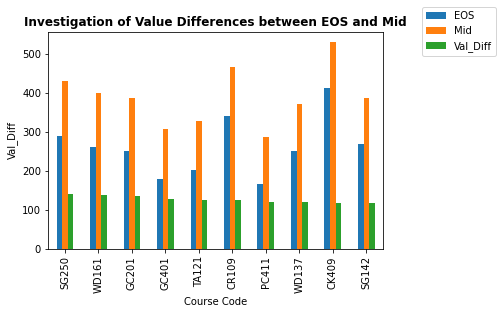

In [80]:
# Now let's plot
df2019_sorted.plot(kind = 'bar', xlabel = 'Course Code', ylabel = 'Val_Diff')
plt.title('Investigation of Value Differences between EOS and Mid', fontsize='large', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 1.0)) # Position legend outside of plot

This was more informative than I initially figured it may be. There are some drastic differences in points between EOS and Mid-point average for 2019. It was very intersting that Accounting courses appears on three occasions in the top-10 value differences. This suggests that the demand for these courses were quite elevated in 2019 compared to previous years. A noteworthy difference is 'Industrial Physics' (CK409), which has a difference of 119 points but is already in the 400-500 range. This is a drastic difference again suggesting demand for the course was elevated. 

<a id='Exploration_of_some_variables_in_Level_7_Data.'></a>


### Exploration of some variables in Level 7 Data.

<a id='Did_any_Courses_cease_operating_from_2019_up_to_2021?'></a>



### Did any Courses cease operating from 2019 up to 2021?



In [81]:
# Let's re-familiarise ourselves with Level 7 data 
df2021_7

,Title,Points_R1_2021,Points_R2_2021
Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,NaN
AL631,Dental Nursing,311,NaN
AL632,Applied Science,297,NaN
AL650,Business,AQA,AQA
...,...,...,...
WD188,Applied Health Care,220,NaN
WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
WD206,Electronic Engineering,180,NaN


In [82]:
# Let's re-familiarise ourselves with Level 7 data 
df2019_l7

,Points_Mid_2019
Code,
AL600,306.0
AL601,272.0
AL602,424.0
AL604,360.0
AL630,366.0
...,...
WD188,339.0
WD205,441.0
WD206,322.0


In [83]:
# Find Codes present both years - this tells us what courses have continued
# Researched from Reference 26
level_seven =  pd.merge(df2019_l7, df2021_7, on='Code')
level_seven_clean =  level_seven.drop(['Points_R2_2021'], axis=1) # we dont need R2 points for this
# let's make sure we dont have two rows with NaN values
level_seven_clean.dropna( subset = ['Points_R1_2021', 'Points_Mid_2019'], how = 'all', inplace = True) 
# print our result
level_seven_clean

,Points_Mid_2019,Title,Points_R1_2021
Code,,,
AL630,366.0,Pharmacy Technician,308
AL631,379.0,Dental Nursing,311
AL632,372.0,Applied Science,297
AL650,317.0,Business,AQA
AL660,216.0,Culinary Arts,AQA
...,...,...,...
WD188,339.0,Applied Health Care,220
WD205,441.0,Molecular Biology with Biopharmaceutical Science,AQA
WD206,322.0,Electronic Engineering,180


We can infer the result here. In 2021 there were 416 courses available (with points on the data). In 2019, there were 461 courses available. I merged these two dataframes together based on 'Code'. This was also a way to get our answer for courses ceased. Only results from both dataframes that had the same code got pulled into our new dataframe. In effect, this dropped all courses that were not in both dataframes, thereby showing us which courses were present in 2019 and in 2021. Since there were 461 courses available in 2019 and our merged result has 321 courses available, we can infer that 138 courses have ceased (or been re-formatted) since.

In [84]:
# Let's look at the value differences between some courses in this dataframe
# Let's convert our Points_R1_2021 column to a float as it is currently an 'object'
level_seven_clean['Points_R1_2021']= pd.to_numeric(level_seven_clean['Points_R1_2021'], errors='coerce').astype('float')
# Code to find the difference in values between EOS and Mid [25]
level_seven_clean['Val_Diff'] = level_seven_clean['Points_Mid_2019'] - level_seven_clean['Points_R1_2021']
# Let's display our result
level_seven_clean.sort_values('Val_Diff', ascending = False).head(15)

,Points_Mid_2019,Title,Points_R1_2021,Val_Diff
Code,,,,
DB572,403.0,Business (Accounting),141.0,262.0
TL780,360.0,Early Childhood Care and Education,100.0,260.0
DB571,371.0,Business Studies,113.0,258.0
GC465,367.0,Communications,118.0,249.0
CR300,509.0,Physical Sciences (Common Entry),260.0,249.0
GC410,357.0,Marketing,122.0,235.0
DK770,369.0,Theatre and Film Practice,140.0,229.0
DS702,365.0,BSc in Computing Level 7 (3 years),136.0,229.0
GC495,338.0,Fashion,110.0,228.0


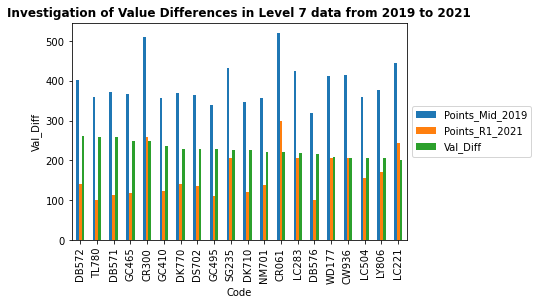

In [85]:
# Let's visualise some of these results
level_seven_cleaned = level_seven_clean.sort_values(by='Val_Diff', ascending=False).head(20)
level_seven_cleaned.plot(kind = 'bar', xlabel = 'Code', ylabel = 'Val_Diff')
plt.title('Investigation of Value Differences in Level 7 data from 2019 to 2021', fontsize='large', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

Here, we can visualise our results. DB572 (Business in Accounting in Dublin Business School) has the biggest difference of 262 points. I verified this from the raw data separately. There are a wide range of courses displayed in our result, which shows that differences weren't focused on one sector alone. The biggest differences observed do seem to point towards a difference in how points are displayed by CAO as opposed to actual point differences however, in my opinion. 

<a id='Which_courses_had_the_most_points_in_2021_and_2019_for_Level_7_that_were_run_both_years?'></a>

### Which courses had the most points in 2021 and 2019 for Level 7 that were run both years? 

In [86]:
# Let's isolate our points of interest
top_5_ = level_seven_cleaned.sort_values(by='Points_R1_2021', ascending=False).head(10)
top_5_2021 = top_5_.drop(columns=['Points_Mid_2019', 'Val_Diff'])


# Let's isolate our points of interest
top_5_19 = level_seven_clean.sort_values(by='Points_Mid_2019', ascending=False)
top_5_2019 = top_5_19.drop(columns=['Points_R1_2021', 'Val_Diff'])

# Lets get rid of courses above 625 points as they onclude separate projects, auditions etc.
top_5_2019 = top_5_2019[(top_5_2019['Points_Mid_2019'] < 625)].head(10)
top_5_2019


,Points_Mid_2019,Title
Code,,
TR802,531.0,Dental Hygiene
CR061,520.0,Electronic Engineering
CR300,509.0,Physical Sciences (Common Entry)
CW106,499.0,Physiology and Health Science
CR075,490.0,Biomedical Engineering
CR001,488.0,Applied Physics and Instrumentation
TR803,477.0,Dental Technology
CR006,467.0,Applied Biosciences
GA175,466.0,Finance


In [87]:
# Lets plot this for 2021 and 2019 using Plotly

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=('2021', '2019')
)

# Add traces
fig.add_trace(go.Bar(x=top_5_2021['Title'] , y=top_5_2021['Points_R1_2021'], name = '2021'), row=1, col=1)
fig.add_trace(go.Bar(x=top_5_2019['Title'],   y=top_5_2019['Points_Mid_2019'], name = '2019'), row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text='Level 7 2021', row=1, col=1)
fig.update_xaxes(title_text='Level 7 2019', row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text='Points', row=1, col=1)


# Update title and height
fig.update_layout(title_text='Top 5 Courses for Level 7 in 2021 and 2019', height=700)

fig.write_image('Images/Top5_L7.png')

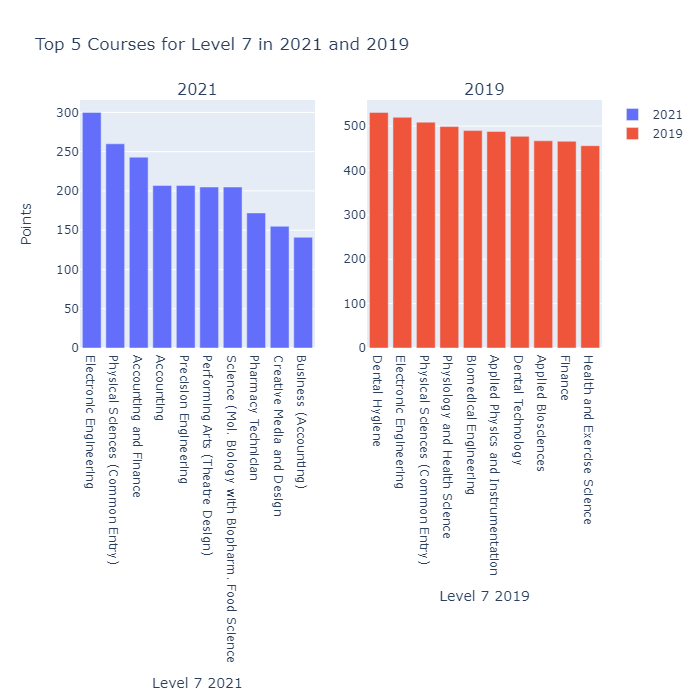

Now we have results for the top 5 Level 7 courses in 2021 and 2019. It is worth noting that only 2 courses (Physical Sciences (Common Entry) and Electronic Engineering) have made both lists. There is also a clear discrepancy between the points-ranges. This is mostly due to a re-formatting of the way points are tallied in 2021. Electronic Engineering (CR061) is the highest course by some distance in Level 7 in 2021.

# The End